Linear Regression to predict House prices
Data Used: BOSTON HOUSING DATA
link: https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

In [ ]:
#Linear Regression to 

In [15]:
from pandas import read_csv
import sklearn as skl

In [16]:
filename='https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'

In [17]:
feature_names=['CrimeRate','Zone','Indus','Chas''NOx','Rooms','Age','Dis','Rad','Tax','PT_Ratio','Blacks','Lstat','MedVal']
'''
Attribute Information:

    1. CrimeRate      per capita crime rate by town
    2. Zone        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. Indus     proportion of non-retail business acres per town
    4. Chas      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOx       nitric oxides concentration (parts per 10 million)
    6. Rooms        average number of rooms per dwelling
    7. Age       proportion of owner-occupied units built prior to 1940
    8. Dis       weighted distances to five Boston employment centres
    9. Rad       index of accessibility to radial highways
    10. Tax      full-value property-tax rate per $10,000
    11. PT_Ratio  pupil-teacher ratio by town
    12. Blacks        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. Lstat    % lower status of the population
    14. MedVal    Median value of owner-occupied homes in $1000's
    '''

"\nAttribute Information:\n\n    1. CrimeRate      per capita crime rate by town\n    2. Zone        proportion of residential land zoned for lots over \n                 25,000 sq.ft.\n    3. Indus     proportion of non-retail business acres per town\n    4. Chas      Charles River dummy variable (= 1 if tract bounds \n                 river; 0 otherwise)\n    5. NOx       nitric oxides concentration (parts per 10 million)\n    6. Rooms        average number of rooms per dwelling\n    7. Age       proportion of owner-occupied units built prior to 1940\n    8. Dis       weighted distances to five Boston employment centres\n    9. Rad       index of accessibility to radial highways\n    10. Tax      full-value property-tax rate per $10,000\n    11. PT_Ratio  pupil-teacher ratio by town\n    12. Blacks        1000(Bk - 0.63)^2 where Bk is the proportion of blacks \n                 by town\n    13. Lstat    % lower status of the population\n    14. MedVal    Median value of owner-occupie

In [18]:
dataframe=read_csv(filename,delim_whitespace=True,names=feature_names)

In [19]:
print(dataframe)

          CrimeRate   Zone  Indus  ChasNOx  Rooms    Age     Dis  Rad    Tax  \
0.00632        18.0   2.31      0    0.538  6.575   65.2  4.0900    1  296.0   
0.02731         0.0   7.07      0    0.469  6.421   78.9  4.9671    2  242.0   
0.02729         0.0   7.07      0    0.469  7.185   61.1  4.9671    2  242.0   
0.03237         0.0   2.18      0    0.458  6.998   45.8  6.0622    3  222.0   
0.06905         0.0   2.18      0    0.458  7.147   54.2  6.0622    3  222.0   
0.02985         0.0   2.18      0    0.458  6.430   58.7  6.0622    3  222.0   
0.08829        12.5   7.87      0    0.524  6.012   66.6  5.5605    5  311.0   
0.14455        12.5   7.87      0    0.524  6.172   96.1  5.9505    5  311.0   
0.21124        12.5   7.87      0    0.524  5.631  100.0  6.0821    5  311.0   
0.17004        12.5   7.87      0    0.524  6.004   85.9  6.5921    5  311.0   
0.22489        12.5   7.87      0    0.524  6.377   94.3  6.3467    5  311.0   
0.11747        12.5   7.87      0    0.5

In [20]:
array=dataframe.values
dataframe.describe()

,CrimeRate,Zone,Indus,ChasNOx,Rooms,Age,Dis,Rad,Tax,PT_Ratio,Blacks,Lstat,MedVal
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [28]:
X=array[:,0:12]
Y=array[:,12]

[[ 18.     2.31   0.   ...  15.3  396.9    4.98]
 [  0.     7.07   0.   ...  17.8  396.9    9.14]
 [  0.     7.07   0.   ...  17.8  392.83   4.03]
 ...
 [  0.    11.93   0.   ...  21.   396.9    5.64]
 [  0.    11.93   0.   ...  21.   393.45   6.48]
 [  0.    11.93   0.   ...  21.   396.9    7.88]]


In [22]:
kfold=skl.model_selection.KFold(n_splits=10,random_state=7)
model=skl.linear_model.LinearRegression()

AttributeError: module 'sklearn' has no attribute 'model_selection'

In [23]:
scoring='neg_mean_squared_error'

In [24]:
results=skl.model_selection.cross_val_score(model,X,Y,cv=kfold,scoring=scoring)
print(results.mean())
print(results)
import matplotlib.pyplot as plt
plt.plot(results)

AttributeError: module 'sklearn' has no attribute 'model_selection'

In [25]:
x_train,x_test,y_train,y_test=skl.cross_validation.train_test_split(X,Y,test_size=0.2,random_state=4)

AttributeError: module 'sklearn' has no attribute 'cross_validation'

In [51]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
model.coef_

array([ 4.27463798e-02,  1.50819601e-02,  3.39302964e+00, -1.59607064e+01,
        3.88905575e+00, -1.04807992e-02, -1.45889429e+00,  2.28396832e-01,
       -1.32108421e-02, -8.96188511e-01,  8.83643220e-03, -4.91193102e-01])

In [54]:
a=model.predict(x_test)

In [61]:
a[0]

11.489378387911259

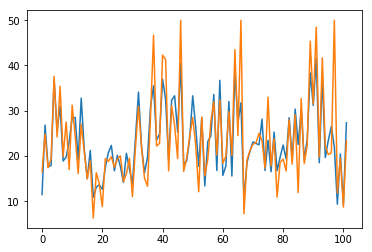

In [66]:
y_test[0]
plt.plot(a)
plt.plot(y_test)

MSE:  25.705931134898844


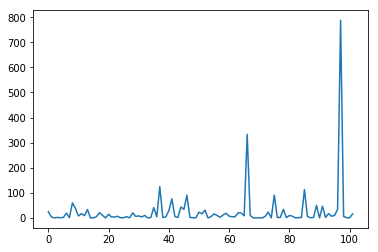

In [70]:
import numpy as np
print("MSE: ",np.mean((a-y_test)**2))
mse=(a-y_test)**2
plt.plot(mse)